<a href="https://colab.research.google.com/github/swordwalid/ML-Projects-/blob/main/Balancing%2Ctrain_several_models_and_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Help (1)/Parkinson/pd_speech_features.csv')

In [ ]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
df.shape

(756, 755)

In [ ]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [ ]:
X=df.drop('class',axis=1)

In [ ]:
X.shape

(756, 754)

In [ ]:
y=df.iloc[:,-1]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64

In [ ]:
import keras

In [ ]:
#keras.utils.all_utils.Sequence

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter=Counter(y)
print('Before oversampling',counter)
sm=SMOTE()
x,y = sm.fit_resample(X,y)
counter=Counter(y)
print('After oversampling',counter)

Before oversampling Counter({1: 564, 0: 192})
After oversampling Counter({1: 564, 0: 564})


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((902, 754), (902,))

In [ ]:
x_test.shape,y_test.shape

((226, 754), (226,))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lr=LogisticRegression()
lr.fit(x_train,y_train)

predlr=lr.predict(x_test)

print(f"Accuracy of support vector  classifier is: {accuracy_score(y_test,predlr )}")

print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy of support vector  classifier is: 0.6283185840707964
[[66 43]
 [41 76]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       109
           1       0.64      0.65      0.64       117

    accuracy                           0.63       226
   macro avg       0.63      0.63      0.63       226
weighted avg       0.63      0.63      0.63       226



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC()
modelSVC.fit(x_train, y_train)
#print(modelSVC.score(x_test, y_test))

y_pred = modelSVC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6504424778761062
[[56 53]
 [26 91]]
              precision    recall  f1-score   support

           0       0.68      0.51      0.59       109
           1       0.63      0.78      0.70       117

    accuracy                           0.65       226
   macro avg       0.66      0.65      0.64       226
weighted avg       0.66      0.65      0.64       226



### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

modelDTC = tree.DecisionTreeClassifier()
modelDTC.fit(x_train, y_train)
#print(modelDTC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelDTC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8584070796460177
[[97 12]
 [20 97]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       109
           1       0.89      0.83      0.86       117

    accuracy                           0.86       226
   macro avg       0.86      0.86      0.86       226
weighted avg       0.86      0.86      0.86       226



### Random Forest

In [ ]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier()
modelRFC.fit(x_train, y_train)
#print(modelRFC.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9380530973451328
[[105   4]
 [ 10 107]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       109
           1       0.96      0.91      0.94       117

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

modelGNB = GaussianNB()
modelGNB.fit(x_train, y_train)
#print(modelMNB.score(x_test, y_test))


# Predicting the Test set results
y_pred = modelGNB.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6194690265486725
[[ 40  69]
 [ 17 100]]
              precision    recall  f1-score   support

           0       0.70      0.37      0.48       109
           1       0.59      0.85      0.70       117

    accuracy                           0.62       226
   macro avg       0.65      0.61      0.59       226
weighted avg       0.64      0.62      0.59       226



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
modelKNN.fit(x_train, y_train)
#print(modelKNN.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6548672566371682
[[73 36]
 [42 75]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       109
           1       0.68      0.64      0.66       117

    accuracy                           0.65       226
   macro avg       0.66      0.66      0.65       226
weighted avg       0.66      0.65      0.65       226



### Gradiant Boosting

In [ ]:
modelGBC = ensemble.GradientBoostingClassifier(max_depth = 3)
modelGBC.fit(x_train, y_train)
#print(modelGBC.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelGBC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9469026548672567
[[106   3]
 [  9 108]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       109
           1       0.97      0.92      0.95       117

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226



### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

modelABC = AdaBoostClassifier(random_state = 96)
modelABC.fit(x_train, y_train)
#print(modelABC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelABC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8893805309734514
[[100   9]
 [ 16 101]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       109
           1       0.92      0.86      0.89       117

    accuracy                           0.89       226
   macro avg       0.89      0.89      0.89       226
weighted avg       0.89      0.89      0.89       226



### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
# loss = 'hinge'
modelSGDC = SGDClassifier()#loss = 'log', penalty = "l1", max_iter = 10
modelSGDC.fit(x_train, y_train)
#print(modelSGDC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelSGDC.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(ac)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5176991150442478
[[  0 109]
 [  0 117]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.52      1.00      0.68       117

    accuracy                           0.52       226
   macro avg       0.26      0.50      0.34       226
weighted avg       0.27      0.52      0.35       226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg_fit=xg.fit(x_train, y_train)
predxg = xg_fit.predict(x_test)

print(f"Accuracy of support vector  classifier is: {accuracy_score(y_test,predxg )}")

print(confusion_matrix(y_test, predxg))
print(classification_report(y_test, predxg))

Accuracy of support vector  classifier is: 0.9424778761061947
[[106   3]
 [ 10 107]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       109
           1       0.97      0.91      0.94       117

    accuracy                           0.94       226
   macro avg       0.94      0.94      0.94       226
weighted avg       0.94      0.94      0.94       226



### Explainability

#### Shap

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.4 MB/s 


In [ ]:
!pip install shapash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 917 kB 14.9 MB/s 
     |████████████████████████████████| 216 kB 68.9 MB/s 
     |████████████████████████████████| 9.9 MB 54.5 MB/s 
     |████████████████████████████████| 1.0 MB 57.0 MB/s 
     |████████████████████████████████| 72 kB 785 kB/s 
     |████████████████████████████████| 642 kB 59.3 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013943 sha256=9098957c6cc3ee9d4914238df471e1587e1e6a20eedff3a6faf358f8c08b82b2
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=2289fa0b393cb78ee65b29b80fda1a3e6019ff3eced23a480d36a1fc99e3d882
  Stored in directory: /root/.cache/pip/wheels/fe/54/53/a8d448db5592874db4313240571ca2c069e55f6a6b29bf5847
Successfully built d

In [ ]:
#Import shapash module
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
SE = SmartExplainer(model=xg_fit)
SE.compile(
x=x_test,

)

In [ ]:
#app = SE.run_app(title_story='Customer default_Data')

In [ ]:
SE.plot.features_importance()

In [ ]:
SE = SmartExplainer(model=modelRFC)
SE.compile(
x=x_test,

)
SE.plot.features_importance()

In [ ]:
SE = SmartExplainer(model=modelGBC)
SE.compile(
x=x_test,

)
SE.plot.features_importance()

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 54.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758226 sha256=5ab4f75587dcd9105b1dbd0b0cc8f0f83fcd0f2fa93b48c9c99af1ba4d41d05f
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=06b6eb4adb7fecd5064684641640aeb9b6e80d2fdd299f5da365d14b828bed44
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take int

In [ ]:
x_train.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=754)

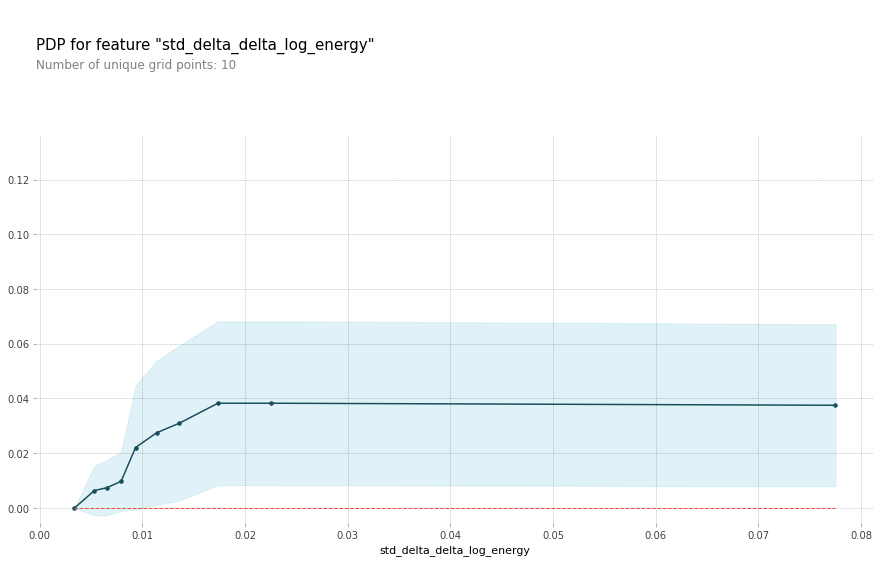

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='std_delta_delta_log_energy')

pdp.pdp_plot(pdp_goals,'std_delta_delta_log_energy')
plt.show()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7eeb5a1650>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7eebb13ed0>})

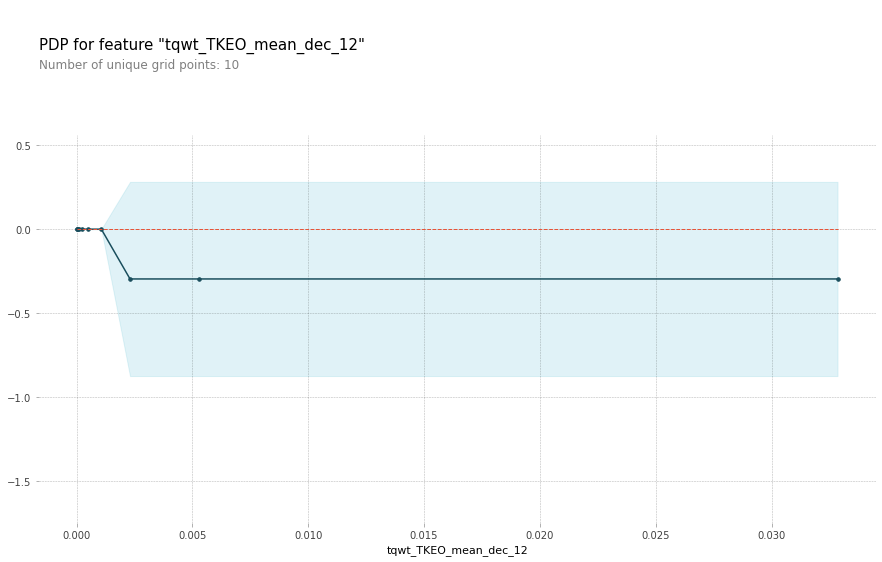

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelDTC,dataset=x_test,model_features=x_test.columns,feature='tqwt_TKEO_mean_dec_12')

pdp.pdp_plot(pdp_goals,'tqwt_TKEO_mean_dec_12')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7eeb670ed0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7eeb65e590>})

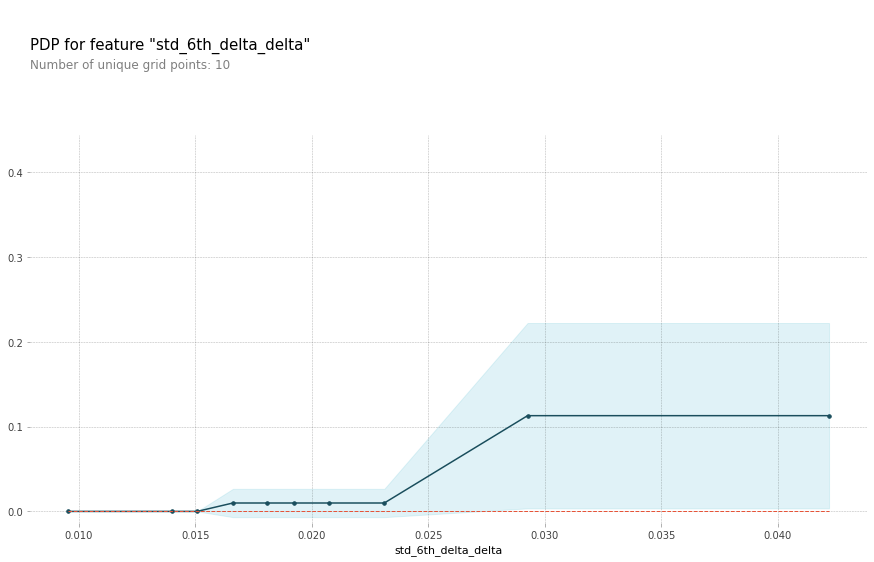

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=xg_fit,dataset=x_test,model_features=x_test.columns,feature='std_6th_delta_delta')

pdp.pdp_plot(pdp_goals,'std_6th_delta_delta')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7eebe47e50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7eebe4dd10>})

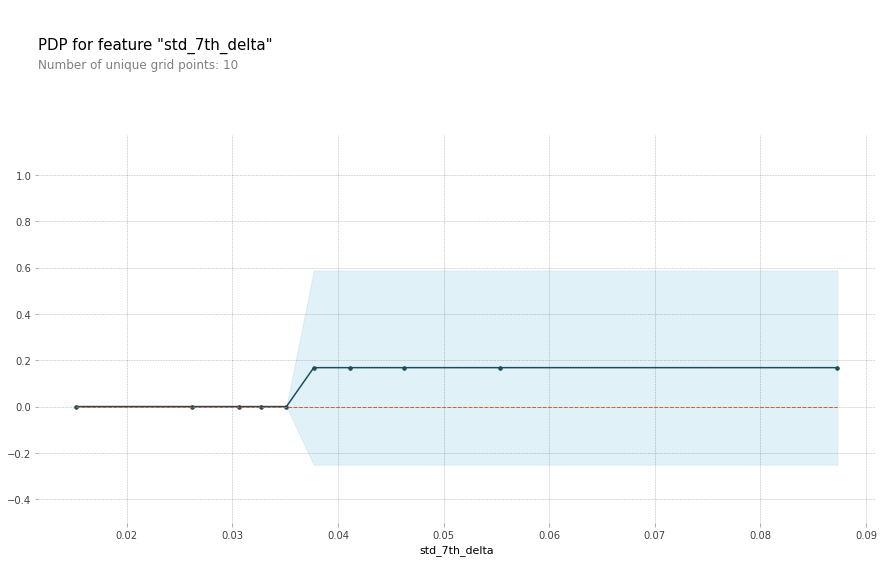

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelDTC,dataset=x_test,model_features=x_test.columns,feature='std_7th_delta')

pdp.pdp_plot(pdp_goals,'std_7th_delta')

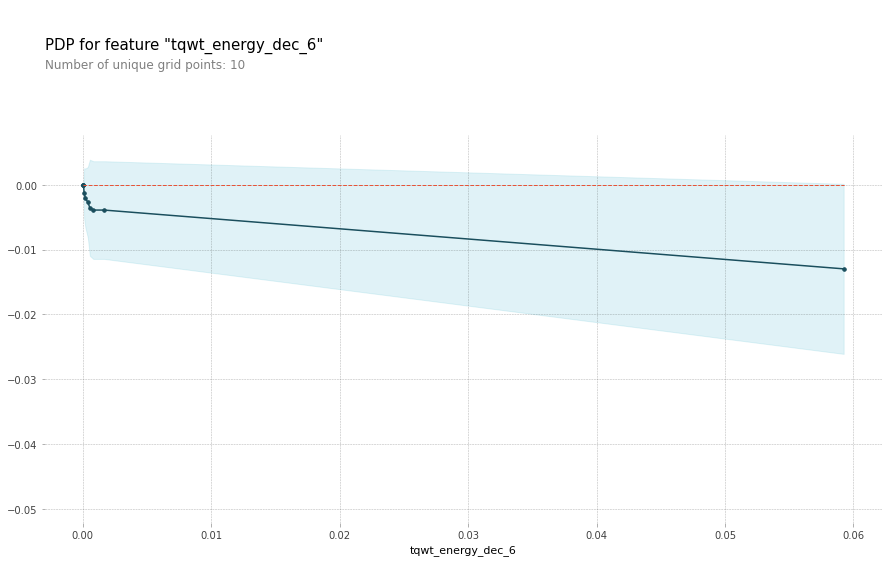

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelRFC,dataset=x_test,model_features=x_test.columns,feature='tqwt_energy_dec_6')

pdp.pdp_plot(pdp_goals,'tqwt_energy_dec_6')
plt.show()

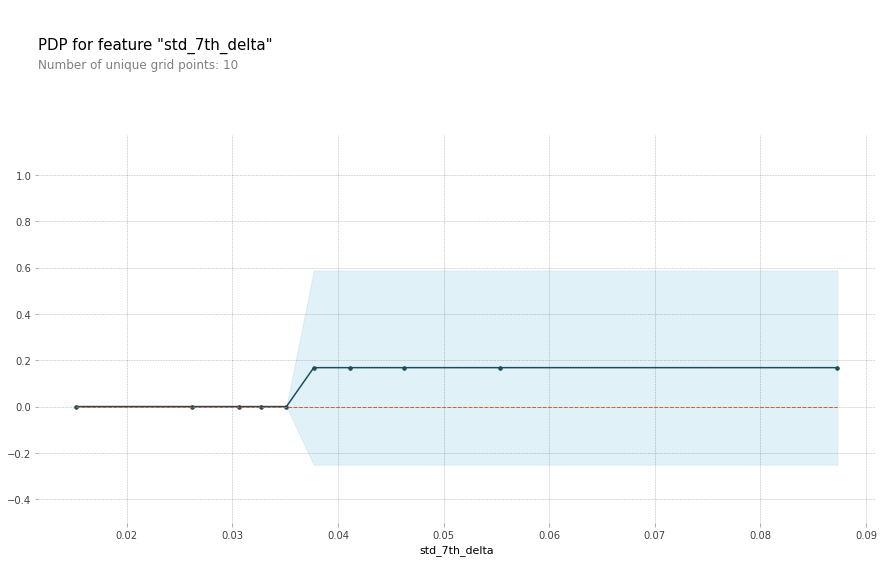

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=modelDTC,dataset=x_test,model_features=x_test.columns,feature='std_7th_delta')

pdp.pdp_plot(pdp_goals,'std_7th_delta')
plt.show()

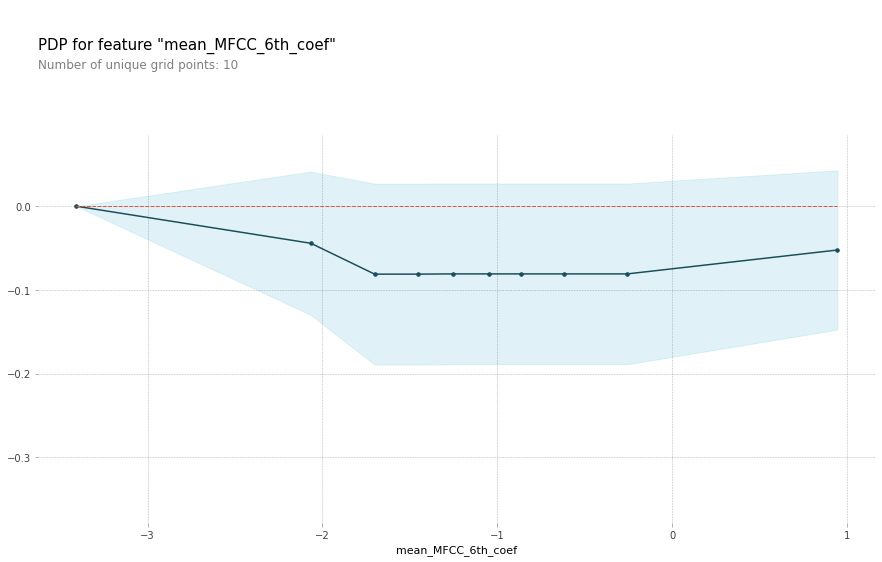

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp,get_dataset,info_plots

# create the data that we will plot
pdp_goals=pdp.pdp_isolate(model=xg_fit,dataset=x_test,model_features=x_test.columns,feature='mean_MFCC_6th_coef')

pdp.pdp_plot(pdp_goals,'mean_MFCC_6th_coef')
plt.show()